In [1]:
from keras.preprocessing.image import ImageDataGenerator, load_img, array_to_img, img_to_array
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D
from keras.layers import Activation, Dropout, Flatten, Dense,  BatchNormalization
from keras import backend as K
from keras import models
from keras import layers
import os, shutil
import numpy as np
import pandas as pd
import pathlib
import matplotlib.pyplot as plt
import tensorflow as tf
import matplotlib.image as mpimg
import cv2
from keras.callbacks import ReduceLROnPlateau
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
from keras import regularizers
%matplotlib inline

In [2]:
train_dir = 'Data/real-vs-fake/train'
test_dir = 'Data/real-vs-fake/test'
val_dir = 'Data/real-vs-fake/valid'

In [3]:
train_generator = ImageDataGenerator(rescale = 1. / 255).flow_from_directory(directory = train_dir, target_size = (128, 128), batch_size = 100000, class_mode = 'binary')
test_generator = ImageDataGenerator(rescale = 1. / 255).flow_from_directory(directory = test_dir, target_size = (128, 128), batch_size = 20000, class_mode = 'binary')
val_generator = ImageDataGenerator(rescale = 1. / 255).flow_from_directory(directory = val_dir, target_size = (128, 128), batch_size = 20000, class_mode = 'binary') 


Found 100000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.


In [4]:
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)
val_images, val_labels = next(val_generator)

In [5]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)
print(val_images.shape)
print(val_labels.shape)

(100000, 128, 128, 3)
(100000,)
(20000, 128, 128, 3)
(20000,)
(20000, 128, 128, 3)
(20000,)


In [6]:
train_labels_reshape = train_labels.reshape(train_labels.shape[0], 1)
test_labels_reshape = test_labels.reshape(test_labels.shape[0], 1)
val_labels_reshape = val_labels.reshape(val_labels.shape[0], 1) 

In [7]:
real = os.listdir('Data/real-vs-fake/train/real')
real_fake_dir = 'Data/real-vs-fake/train/real'

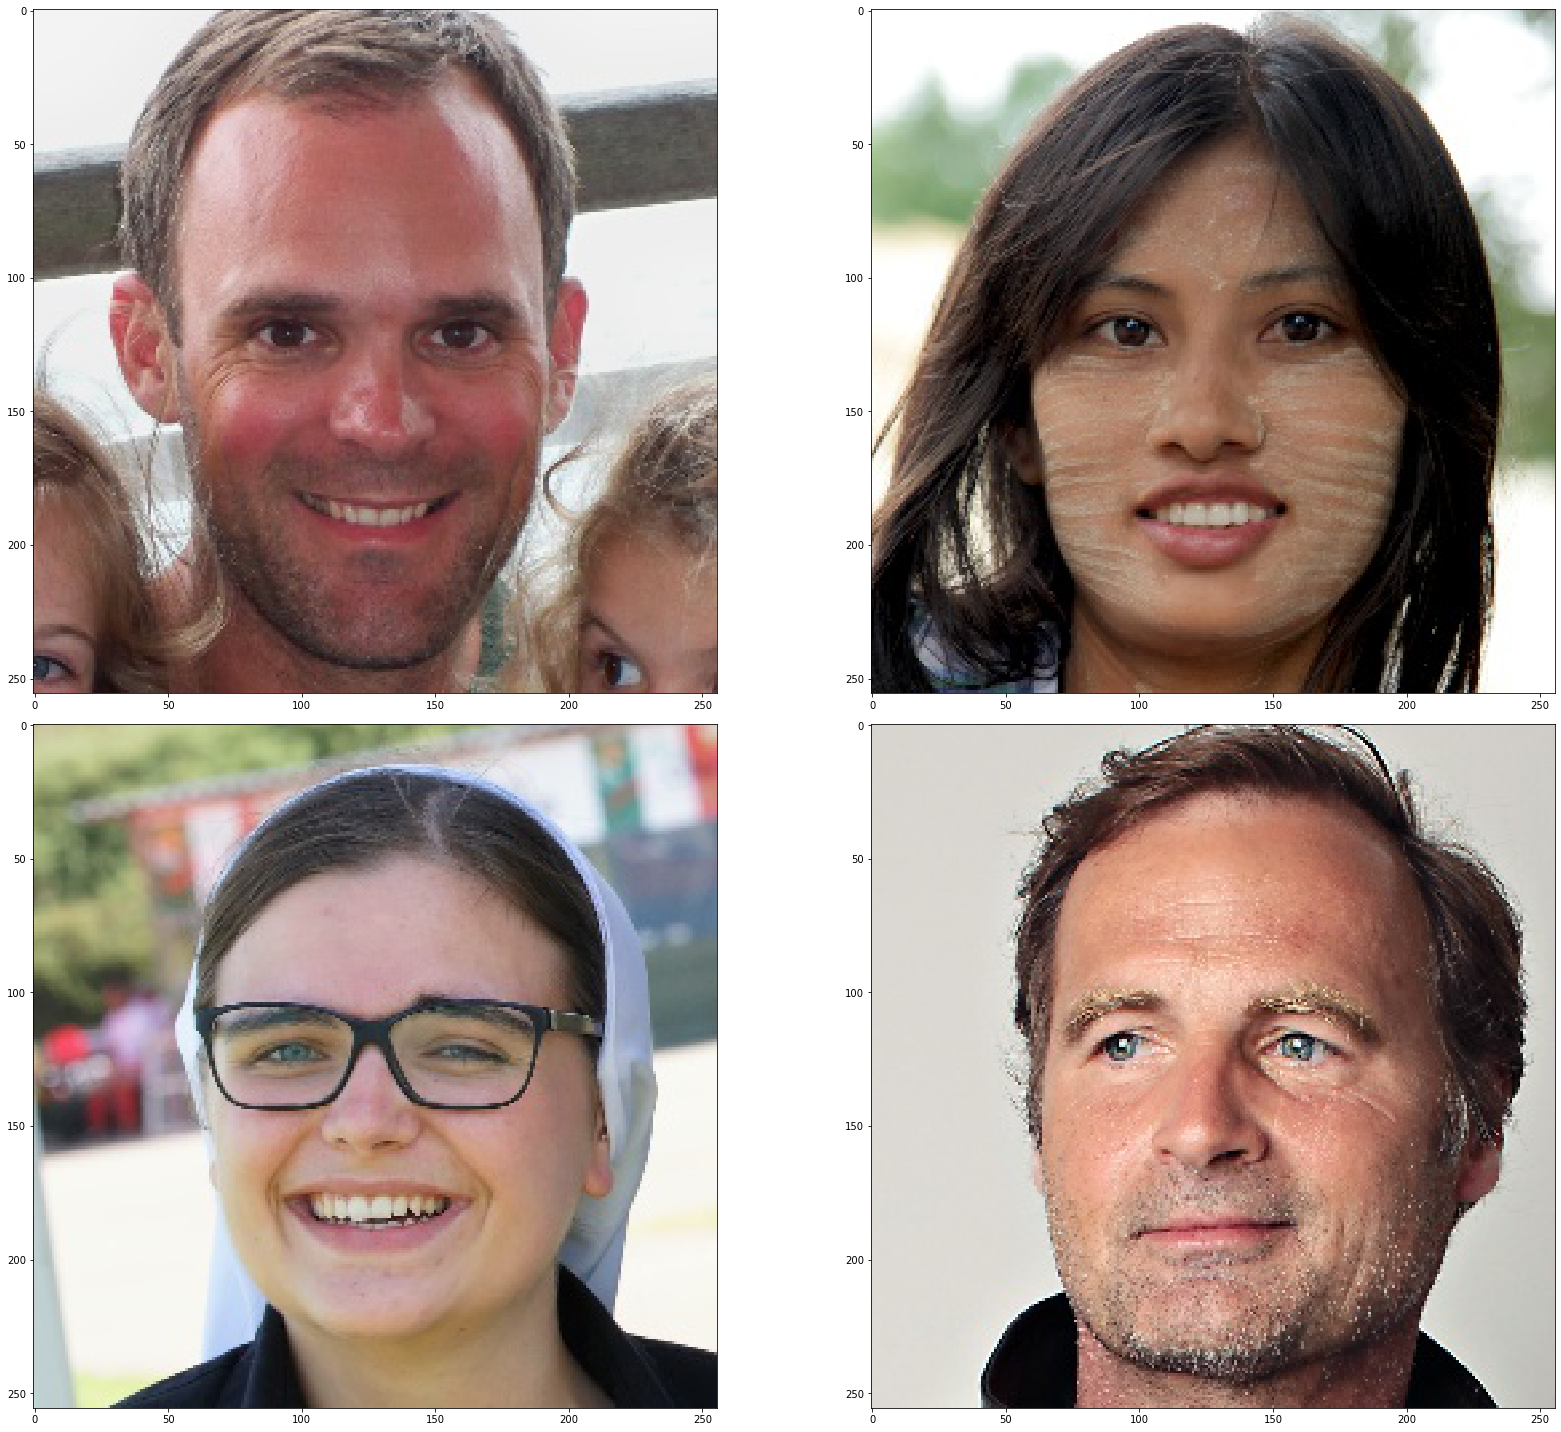

In [8]:
plt.figure(figsize = (25, 20)) 

for i in range(4):
    plt.subplot(2, 2, i+1)    #
    img = plt.imread(os.path.join(real_fake_dir, real[i]))
#     plt.imshow(img[i])
    plt.imshow(img, cmap = 'gray')
plt.tight_layout()
plt.show()

In [9]:
fake = os.listdir('Data/real-vs-fake/train/fake')
real_fake_dir = 'Data/real-vs-fake/train/fake'

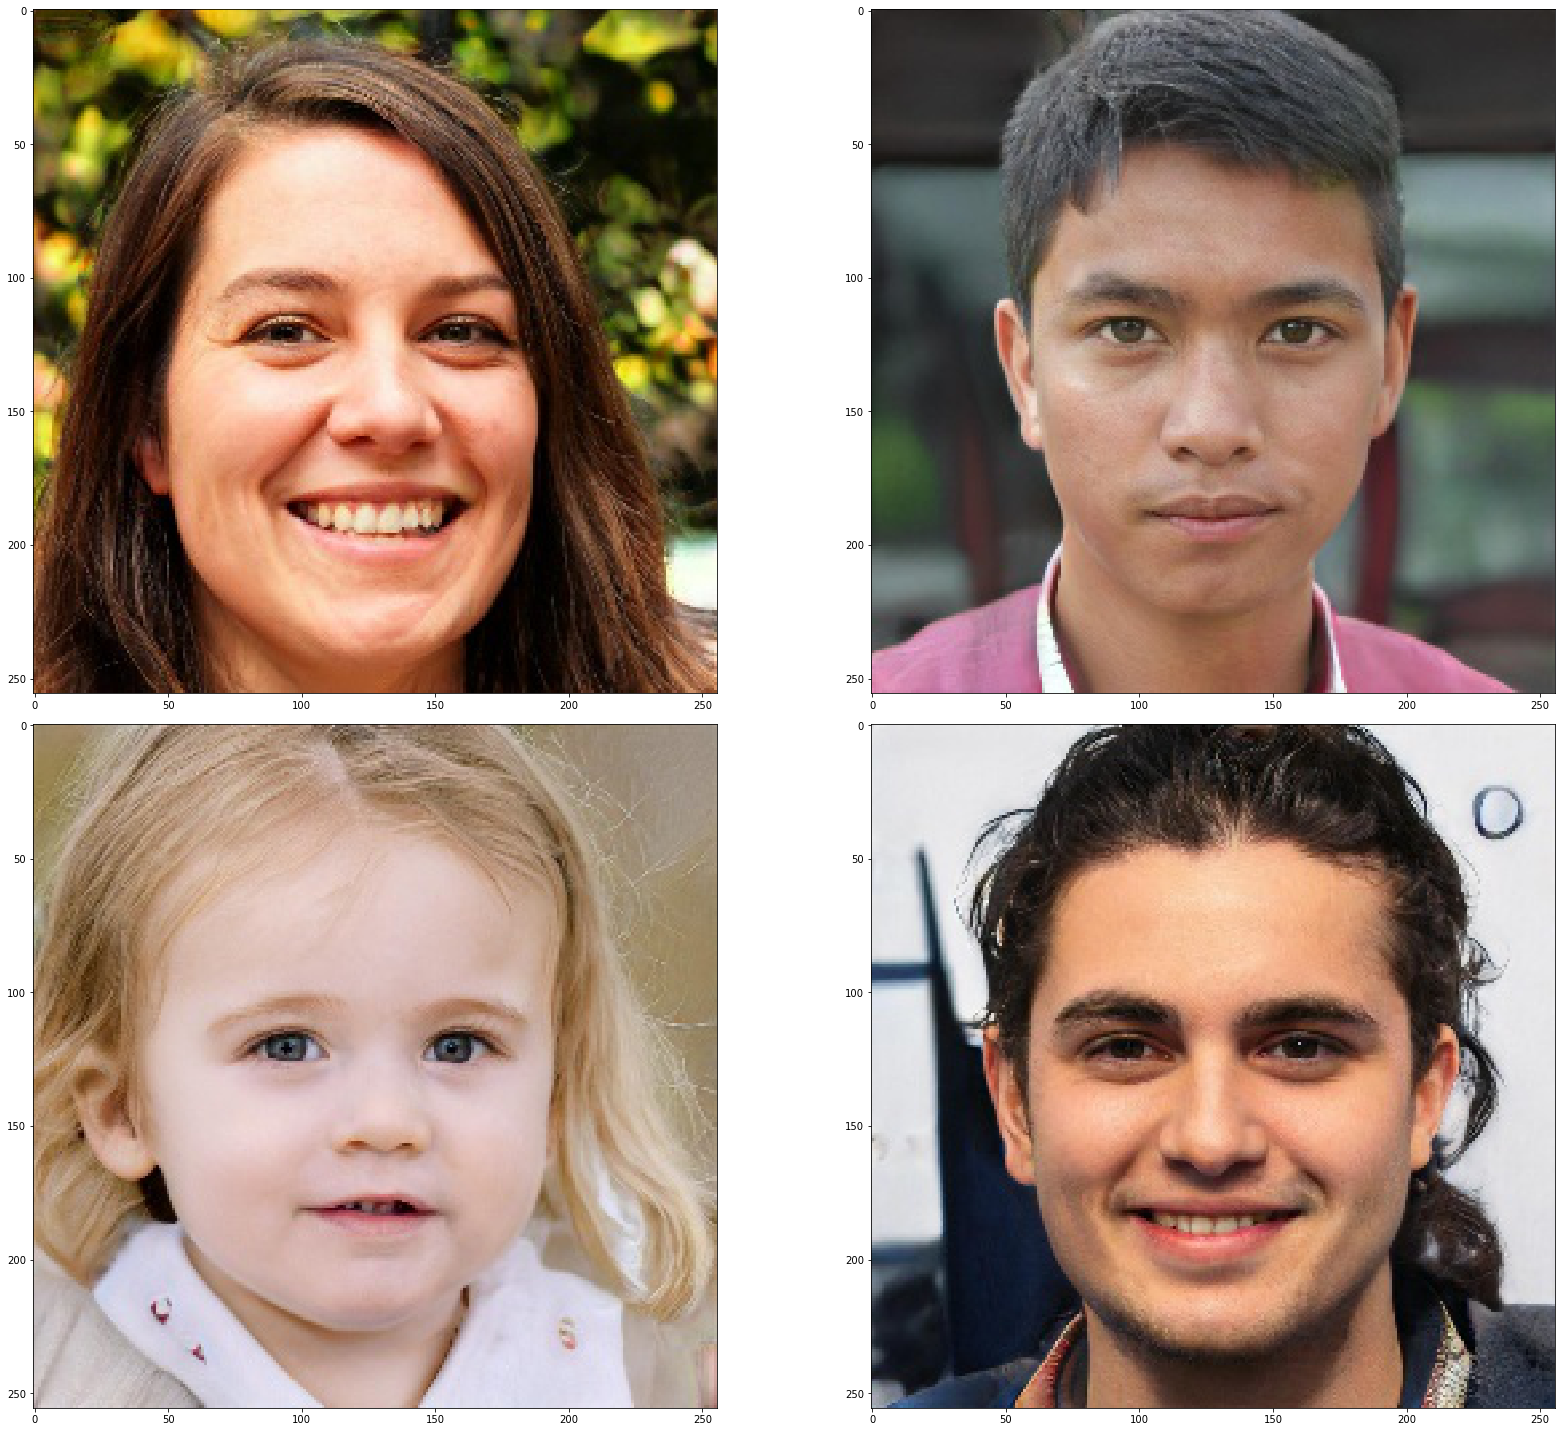

In [10]:
plt.figure(figsize = (25, 20)) 

for i in range(4):
    plt.subplot(2, 2, i+1)    #
    img = plt.imread(os.path.join(real_fake_dir, fake[i]))
#     plt.imshow(img[i])
    plt.imshow(img, cmap = 'gray')
plt.tight_layout()
plt.show()

In [11]:
model1 = Sequential()
model1.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (128,128,3)))
model1.add(BatchNormalization())
model1.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model1.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model1.add(Dropout(0.1))
model1.add(BatchNormalization())
model1.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model1.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model1.add(BatchNormalization())
model1.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model1.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model1.add(Dropout(0.2))
model1.add(BatchNormalization())
model1.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model1.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model1.add(Dropout(0.2))
model1.add(BatchNormalization())
model1.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model1.add(Flatten())
model1.add(Dense(units = 128 , activation = 'relu'))
model1.add(Dropout(0.2))
model1.add(Dense(units = 1 , activation = 'sigmoid'))
model1.compile(optimizer = "rmsprop" , loss = 'binary_crossentropy' , metrics = ['acc'])
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 64, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0

In [12]:
history1 = model1.fit(train_images, train_labels_reshape, batch_size = 32, epochs = 5, validation_data = (test_images, test_labels_reshape))


Epoch 1/5
3125/3125 [==============================] - 4068s 1s/step - loss: 0.6130 - acc: 0.7038 - val_loss: 0.3914 - val_acc: 0.8309
Epoch 2/5
3125/3125 [==============================] - 3363s 1s/step - loss: 0.2956 - acc: 0.8818 - val_loss: 0.3556 - val_acc: 0.8306
Epoch 3/5
3125/3125 [==============================] - 3403s 1s/step - loss: 0.1981 - acc: 0.9250 - val_loss: 0.2190 - val_acc: 0.9126
Epoch 4/5
3125/3125 [==============================] - 13614s 4s/step - loss: 0.1595 - acc: 0.9422 - val_loss: 0.3774 - val_acc: 0.8711
Epoch 5/5
3125/3125 [==============================] - 38061s 12s/step - loss: 0.1253 - acc: 0.9559 - val_loss: 0.1592 - val_acc: 0.9378


In [13]:
train_result = model1.evaluate(train_images, train_labels_reshape)
test_result = modell1evaluate(test_images, test_labels_reshape)


3125/3125 [==============================] - 1115s 357ms/step - loss: 0.1179 - acc: 0.9532


NameError: name 'modell1evaluate' is not defined

In [15]:
test_result = model1.evaluate(test_images, test_labels_reshape)

625/625 [==============================] - 183s 293ms/step - loss: 0.1592 - acc: 0.9378


In [16]:
print(f'train_result:{train_result},test_result:{test_result}')

train_result:[0.1179305762052536, 0.9531800150871277],test_result:[0.15918299555778503, 0.9378499984741211]


/Users/janakiganesh/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


predictions: [1 1 0 0 0 1 0 0 0 1 0 0 0 0 1]
classification_report :                 precision    recall  f1-score   support

Real (Class 0)       0.93      0.95      0.94     10000
Fake (Class 1)       0.95      0.93      0.94     10000

      accuracy                           0.94     20000
     macro avg       0.94      0.94      0.94     20000
  weighted avg       0.94      0.94      0.94     20000



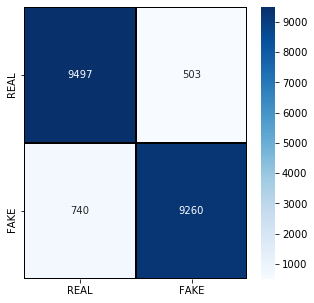

In [18]:
predictions = model1.predict_classes(test_images)
predictions = predictions.reshape(1,-1)[0]
print("predictions:",predictions[:15])
#  classification report   
print('classification_report :',classification_report(test_labels_reshape, predictions, target_names = ['Real (Class 0)','Fake (Class 1)']))
#  confusion matrix
cm = confusion_matrix(test_labels_reshape,predictions)
cm = pd.DataFrame(cm , index = ['0','1'] , columns = ['0','1'])
labels = ['REAL', 'FAKE']
plt.figure(figsize = (5,5))
ax=sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='',xticklabels = labels,yticklabels = labels)
ax.set_ylim(2, 0)
plt.show()

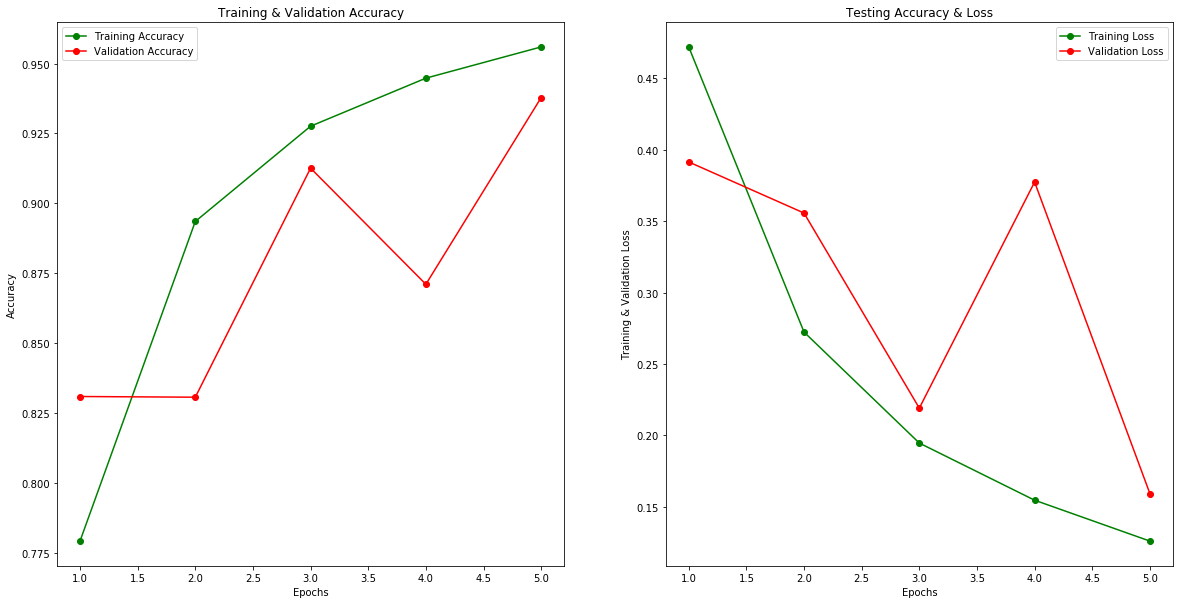

In [25]:
fig , ax = plt.subplots(1,2)
fig.set_size_inches(20,10)
#     Fetching the accuracy value from the model history
model_dict = history1.history
acc_values = model_dict['acc'] 
val_acc_values = model_dict['val_acc']
#     Fetching the loss value from the model history
loss_values = model_dict['loss'] 
val_loss_values = model_dict['val_loss']
#     plotting accuracy graph
epochs = range(1, len(acc_values) + 1)
ax[0].plot(epochs , acc_values , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc_values , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")
#     plotting loss graph
ax[1].plot(epochs , loss_values , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss_values , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()

In [13]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)


In [20]:
model2 = Sequential()
model2.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (128,128,3)))
model2.add(BatchNormalization())
model2.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model2.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model2.add(Dropout(0.1))
model2.add(BatchNormalization())
model2.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model2.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model2.add(BatchNormalization())
model2.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model2.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model2.add(Dropout(0.2))
model2.add(BatchNormalization())
model2.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model2.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model2.add(Dropout(0.2))
model2.add(BatchNormalization())
model2.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model2.add(Flatten())
model2.add(Dense(units = 128 , activation = 'relu'))
model2.add(Dropout(0.2))
model2.add(Dense(units = 1 , activation = 'sigmoid'))
# compiling the model
model2.compile(optimizer = "rmsprop" , loss = 'binary_crossentropy' , metrics = ['acc'])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
batch_normalization_5 (Batch (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
dropout_4 (Dropout)          (None, 64, 64, 64)        0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 64, 64, 64)        256       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 32, 32, 64)       

In [21]:
history2 = model2.fit(train_images, train_labels_reshape, batch_size = 32, epochs = 5, validation_data = (test_images, test_labels_reshape), callbacks = [learning_rate_reduction])


Epoch 1/5
3125/3125 [==============================] - 3233s 1s/step - loss: 0.6375 - acc: 0.7053 - val_loss: 0.3252 - val_acc: 0.8562
Epoch 2/5
3125/3125 [==============================] - 3327s 1s/step - loss: 0.2853 - acc: 0.8854 - val_loss: 0.3183 - val_acc: 0.8634
Epoch 3/5
3125/3125 [==============================] - 9585s 3s/step - loss: 0.1973 - acc: 0.9279 - val_loss: 0.3014 - val_acc: 0.8622
Epoch 4/5
3125/3125 [==============================] - 3446s 1s/step - loss: 0.1478 - acc: 0.9457 - val_loss: 0.2137 - val_acc: 0.9136
Epoch 5/5
3125/3125 [==============================] - 32470s 10s/step - loss: 0.1212 - acc: 0.9579 - val_loss: 0.1741 - val_acc: 0.9419


In [22]:
train_result = model2.evaluate(train_images, train_labels_reshape)
test_result = model2.evaluate(test_images, test_labels_reshape)
print(f'train_result:{train_result},test_result:{test_result}')

625/625 [==============================] - 195s 312ms/step - loss: 0.1741 - acc: 0.9419
train_result:[0.133559450507164, 0.9526200294494629],test_result:[0.1741326004266739, 0.9418500065803528]


/Users/janakiganesh/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


predictions: [1 1 0 0 0 1 0 0 0 1 0 1 0 0 1]
classification_report :                 precision    recall  f1-score   support

Real (Class 0)       0.98      0.90      0.94     10000
Fake (Class 1)       0.91      0.98      0.94     10000

      accuracy                           0.94     20000
     macro avg       0.94      0.94      0.94     20000
  weighted avg       0.94      0.94      0.94     20000



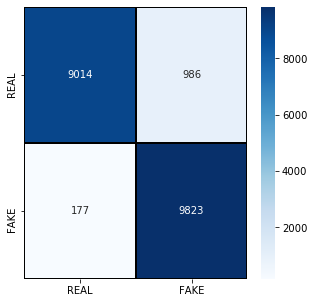

In [23]:
predictions = model2.predict_classes(test_images)
predictions = predictions.reshape(1,-1)[0]
print("predictions:",predictions[:15])
#  classification report   
print('classification_report :',classification_report(test_labels_reshape, predictions, target_names = ['Real (Class 0)','Fake (Class 1)']))
#  confusion matrix
cm = confusion_matrix(test_labels_reshape,predictions)
cm = pd.DataFrame(cm , index = ['0','1'] , columns = ['0','1'])
labels = ['REAL', 'FAKE']
plt.figure(figsize = (5,5))
ax=sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='',xticklabels = labels,yticklabels = labels)
ax.set_ylim(2, 0)
plt.show()

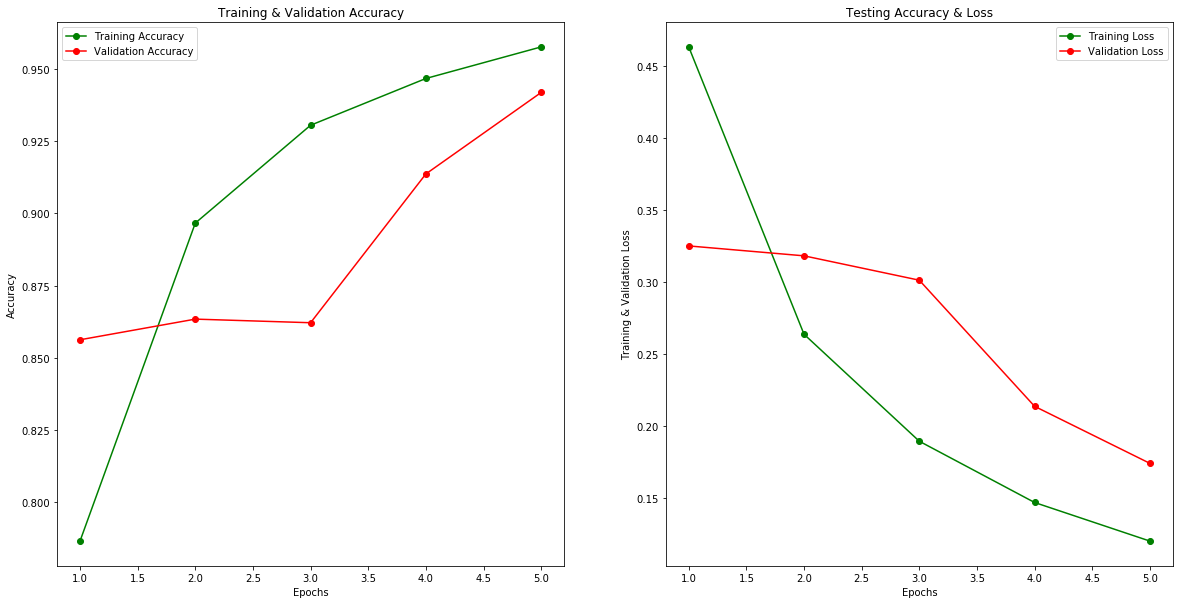

In [24]:
fig , ax = plt.subplots(1,2)
fig.set_size_inches(20,10)
#     Fetching the accuracy value from the model history
model_dict = history2.history
acc_values = model_dict['acc'] 
val_acc_values = model_dict['val_acc']
#     Fetching the loss value from the model history
loss_values = model_dict['loss'] 
val_loss_values = model_dict['val_loss']
#     plotting accuracy graph
epochs = range(1, len(acc_values) + 1)
ax[0].plot(epochs , acc_values , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc_values , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")
#     plotting loss graph
ax[1].plot(epochs , loss_values , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss_values , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()

In [11]:
model3 = Sequential()
model3.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (128,128,3)))
model3.add(BatchNormalization())
model3.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model3.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model3.add(Dropout(0.1))
model3.add(BatchNormalization())
model3.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model3.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model3.add(BatchNormalization())
model3.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model3.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model3.add(Dropout(0.2))
model3.add(BatchNormalization())
model3.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model3.add(Conv2D(512 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model3.add(Dropout(0.2))
model3.add(BatchNormalization())
model3.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model3.add(Flatten())
model3.add(Dense(units = 2048 , activation = 'relu'))
model3.add(Dropout(0.2))
model3.add(Dense(units = 1024 , activation = 'relu'))
model3.add(Dropout(0.2))
model3.add(Dense(units = 1 , activation = 'sigmoid'))
# compiling the model
model3.compile(optimizer = "rmsprop" , loss = 'binary_crossentropy' , metrics = ['acc'])
model3.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 64, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0

In [14]:
batch_size = 32
history3 = model3.fit(train_images, train_labels_reshape, batch_size = 32, steps_per_epoch = int(np.ceil(100000/float(batch_size))), epochs = 5, validation_data = (test_images, test_labels_reshape),validation_steps = int(np.ceil(20000/float(batch_size))), callbacks = [learning_rate_reduction])



Epoch 1/5
3125/3125 [==============================] - 14274s 5s/step - loss: 1.4354 - acc: 0.6454 - val_loss: 0.5488 - val_acc: 0.7516
Epoch 2/5
3125/3125 [==============================] - 16985s 5s/step - loss: 0.3501 - acc: 0.8620 - val_loss: 0.2868 - val_acc: 0.8844
Epoch 3/5
3125/3125 [==============================] - 94570s 30s/step - loss: 0.2332 - acc: 0.9165 - val_loss: 0.2951 - val_acc: 0.9102
Epoch 4/5
3125/3125 [==============================] - 18887s 6s/step - loss: 0.1746 - acc: 0.9386 - val_loss: 0.1584 - val_acc: 0.9490
Epoch 5/5
3125/3125 [==============================] - 5290s 2s/step - loss: 0.1427 - acc: 0.9527 - val_loss: 0.4519 - val_acc: 0.9416


In [15]:
train_result = model3.evaluate(train_images, train_labels_reshape)
test_result = model3.evaluate(test_images, test_labels_reshape)
print(f'train_result:{train_result},test_result:{test_result}')

625/625 [==============================] - 264s 423ms/step - loss: 0.4519 - acc: 0.9416
train_result:[0.270733505487442, 0.9577800035476685],test_result:[0.451890766620636, 0.9416499733924866]


/Users/janakiganesh/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


predictions: [1 0 1 0 1 0 1 0 0 0 1 0 1 1 1]
classification_report :                 precision    recall  f1-score   support

Real (Class 0)       0.96      0.92      0.94     10000
Fake (Class 1)       0.92      0.97      0.94     10000

      accuracy                           0.94     20000
     macro avg       0.94      0.94      0.94     20000
  weighted avg       0.94      0.94      0.94     20000



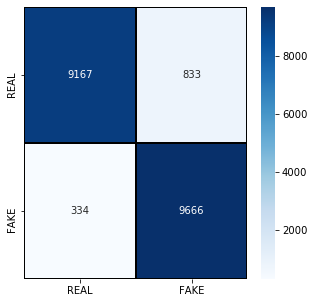

In [16]:
predictions = model3.predict_classes(test_images)
predictions = predictions.reshape(1,-1)[0]
print("predictions:",predictions[:15])
#  classification report   
print('classification_report :',classification_report(test_labels_reshape, predictions, target_names = ['Real (Class 0)','Fake (Class 1)']))
#  confusion matrix
cm = confusion_matrix(test_labels_reshape,predictions)
cm = pd.DataFrame(cm , index = ['0','1'] , columns = ['0','1'])
labels = ['REAL', 'FAKE']
plt.figure(figsize = (5,5))
ax=sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='',xticklabels = labels,yticklabels = labels)
ax.set_ylim(2, 0)
plt.show()

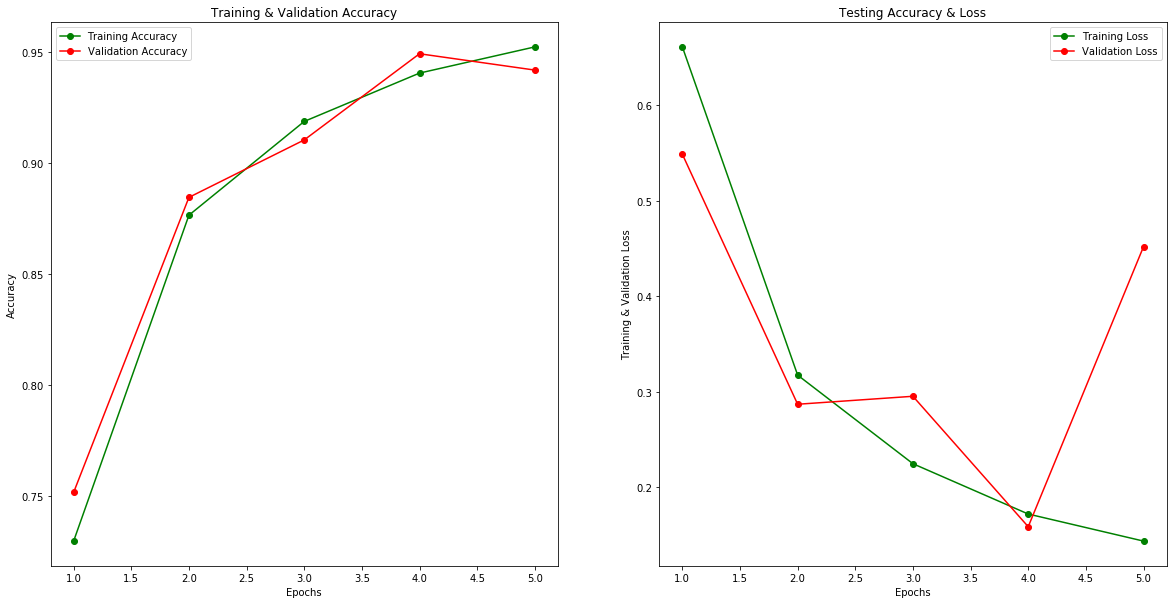

In [17]:
fig , ax = plt.subplots(1,2)
fig.set_size_inches(20,10)
#     Fetching the accuracy value from the model history
model_dict = history3.history
acc_values = model_dict['acc'] 
val_acc_values = model_dict['val_acc']
#     Fetching the loss value from the model history
loss_values = model_dict['loss'] 
val_loss_values = model_dict['val_loss']
#     plotting accuracy graph
epochs = range(1, len(acc_values) + 1)
ax[0].plot(epochs , acc_values , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc_values , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")
#     plotting loss graph
ax[1].plot(epochs , loss_values , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss_values , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()